### Reconhecimento Facial com Machine Learning

In [1]:
# Imports
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import svm

# Dataset de Imagens
from sklearn import datasets

# Plots
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Carregamento do dataset
# Mínimo 70 imagens por pessoa com fator de redimensionamento de 0.4
dataset_faces = datasets.fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

In [3]:
# Shape do dataset
dataset_faces.data.shape

(1288, 1850)

In [23]:
# Verificação do shape das imagens
n_sample, height, width = dataset_faces.images.shape
print('\nTamanho da amostra:', n_sample)
print('Altura: {height}px \nLargura: {width}px'.format(width = width, height = height))


Tamanho da amostra: 1288
Altura: 50px 
Largura: 37px


In [5]:
# Quando carregamos os dados com o Keras, ele oferece dois atributos para o dataset: data e target
# Colocamos data em x (variáveis de entrada) e target em y (variável de saída)
x = dataset_faces.data

# Número de atributos de x
# Representa o número de pixels com o qual iremos trabalhar para treinar o modelo (número de variáveis do dataset)
n_attributes = x.shape[1]
n_attributes

1850

In [6]:
# Cada pixel pode ter um valor de 0 à 255 para imagens em preto e branco
print(x)

[[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
 [ 39.666668  50.333332  47.       ... 117.666664 115.       133.66667 ]
 [ 89.333336 104.       126.       ... 175.33333  183.33333  183.      ]
 ...
 [ 86.        80.333336  74.666664 ...  44.        49.666668  44.666668]
 [ 50.333332  65.666664  88.       ... 197.       179.33333  166.33333 ]
 [ 30.        27.        32.666668 ...  35.        35.333332  61.      ]]


In [7]:
# Definimos o target y
y = dataset_faces.target

In [8]:
# Nomes das classes
target_names = dataset_faces.target_names
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [9]:
# Total de classes
n_class = target_names.shape[0]
n_class

7

In [10]:
# Resumo dos dados
print("\nTamanho Total do Dataset\n")
print("Número de Amostras: %d" % n_sample)
print("Número de Variáveis: %d" % n_attributes)
print("Número de Classes: %d" % n_class)


Tamanho Total do Dataset

Número de Amostras: 1288
Número de Variáveis: 1850
Número de Classes: 7


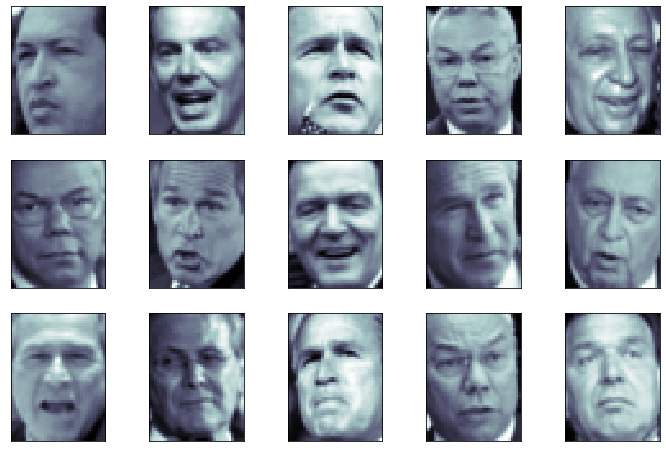

In [11]:
# Plot de imagens
# Tamanho da área de plotagem
fig = plt.figure(figsize = (12, 8))

# Plot de 15 imagens
for i in range(15):
    
    # Dividimos a área total de plotagem definida acima, em subplots, 
    # um para cada bloco de imagens, com 5 colunas e 3 linhas
    ax = fig.add_subplot(3, 5, i + 1, xticks = [], yticks = [])
    
    # Mostramos as imagens
    ax.imshow(dataset_faces.images[i], cmap = plt.cm.bone)

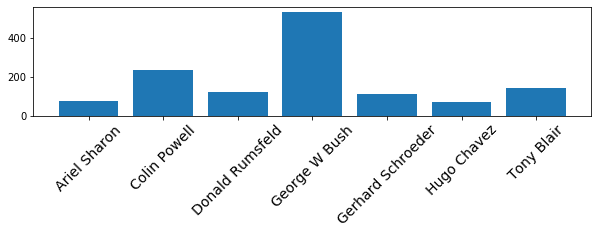

In [12]:
# Tamanho da área de plotagem
plt.figure(figsize = (10, 2))

# Valores únicos da classe target
unique_targets = np.unique(dataset_faces.target)

# Total de cada classe
counts = [(dataset_faces.target == i).sum() for i in unique_targets]

# Resultado
plt.xticks(unique_targets, dataset_faces.target_names[unique_targets])
locs, labels = plt.xticks()
plt.setp(labels, rotation = 45, size = 14)
_ = plt.bar(unique_targets, counts)

In [13]:
# Split do dataset
x_train, x_test, y_train, y_test = train_test_split(dataset_faces.data, dataset_faces.target, random_state = 0)
print(x_train.shape, x_test.shape)

(966, 1850) (322, 1850)


In [14]:
# Como temos muitas variáveis, fazemos a aplicação da redução de dimensionalidade (PCA)
pca = decomposition.PCA(n_components = 150,
                        whiten = True,
                        random_state = 1999,
                        svd_solver = 'randomized')

In [15]:
# Treinamento do modelo PCA com os dados de treino
# O PCA é um algoritmo de aprendizagem não supervisionada
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=1999,
    svd_solver='randomized', tol=0.0, whiten=True)

In [16]:
# Aplicação do modelo PCA nos dados de treino e teste
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

print('x_train:', x_train_pca.shape)
print('x_test:', x_test_pca.shape)

x_train: (966, 150)
x_test: (322, 150)


In [20]:
# Modelo de Machine Learning
svm_model = svm.SVC(C = 5., gamma = 0.001)

# Treinamento do modelo
svm_model.fit(x_train_pca, y_train)

SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

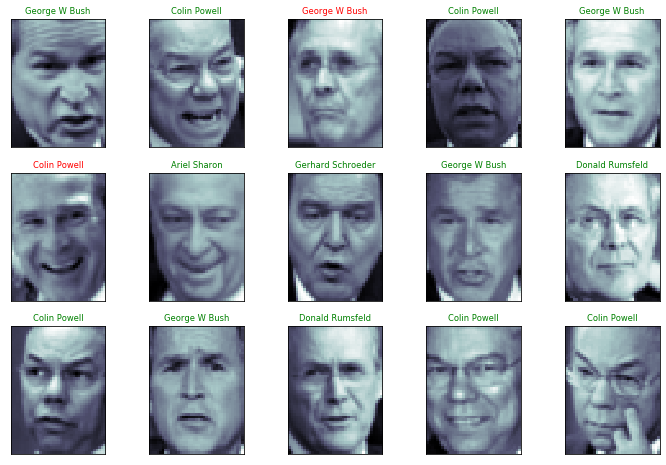

In [24]:
# Tamanho da área de plotagem
fig = plt.figure(figsize = (12, 8))

# Loop pelas imagens
for i in range(15):
    
    # Subplots
    ax = fig.add_subplot(3, 5, i + 1, xticks = [], yticks = [])
    
    # Mostra a imagem real no dataset de teste
    ax.imshow(x_test[i].reshape((50, 37)), cmap = plt.cm.bone)
    
    # Faz a previsão de classe com o modelo treinado
    y_pred = svm_model.predict(x_test_pca[i].reshape(1,-1))[0]
    
    # Se a previsão tiver um resultado correto, colocamos o nome em verde, se não em vermelho
    # Nome em vermelho significa erro do modelo
    color = 'green' if y_pred == y_test[i] else 'red'
    
    # Define o título
    ax.set_title(dataset_faces.target_names[y_pred], fontsize = 'small', color = color)

In [29]:
# Acurácia do modelo
accuracy = svm_model.score(x_test_pca, y_test)

print('Acurácia: %.1f%%' % (accuracy * 100))

Acurácia: 84.2%


In [31]:
# Salvando o modelo
import pickle

file = 'modelos/modelo_1.sav'
pickle.dump(svm_model, open(file, 'wb'))
print("Modelo salvo!")

Modelo salvo!


In [32]:
# Carregando o arquivo
modelo_1 = pickle.load(open(file, 'rb'))
print("Modelo carregado!")

Modelo carregado!
